In [1]:
!rm titanic-en.csv
!wget https://raw.githubusercontent.com/bdm-unlu/2021/main/TPs/TP05/TP0501/titanic-en.csv

rm: cannot remove 'titanic-en.csv': No such file or directory
--2021-10-23 20:26:14--  https://raw.githubusercontent.com/bdm-unlu/2021/main/TPs/TP05/TP0501/titanic-en.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42177 (41K) [text/plain]
Saving to: ‘titanic-en.csv’

titanic-en.csv      100%[===================>]  41.19K  --.-KB/s    in 0s      

2021-10-23 20:26:14 (87.7 MB/s) - ‘titanic-en.csv’ saved [42177/42177]



In [2]:
import pandas as pd 

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import preprocessing

import graphviz

In [3]:
titanic = pd.read_csv("titanic-en.csv")

titanic.head()

,class,age,sex,survived
0,1st,adult,male,yes
1,1st,adult,male,yes
2,1st,adult,male,yes
3,1st,adult,male,yes
4,1st,adult,male,yes


Debo pasar los atributos a continuos

In [4]:
le = preprocessing.LabelEncoder()
for column_name in titanic.columns:
  if (titanic[column_name].dtype == object) & (column_name!='survived'):
    titanic[column_name] = le.fit_transform(titanic[column_name])

titanic.head()

,class,age,sex,survived
0,0,0,1,yes
1,0,0,1,yes
2,0,0,1,yes
3,0,0,1,yes
4,0,0,1,yes


In [5]:
feature_names = list(titanic.columns)
feature_names.remove("survived")
x = titanic[feature_names]

feature_names

['class', 'age', 'sex']

Con esos atributos, debo determinar si sobrevivió o no.

Guardo en x, todos los datos del titanic, con esos feature_names



In [6]:
#Target
y = titanic.survived

le.fit(titanic['survived'])
target_names=le.classes_

y.head()

0    yes
1    yes
2    yes
3    yes
4    yes
Name: survived, dtype: object

In [7]:
target_names

array(['no', 'yes'], dtype=object)

In [83]:
i = 0
acum = 0

for i in range (1000):
  X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20)
  arbol_parametrizado = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10)
  arbol_parametrizado = arbol_parametrizado.fit(X_train,y_train)
  y_pred = arbol_parametrizado.predict(X_test)

  

  acum = acum + metrics.accuracy_score(y_test, y_pred)
  i = i+1

print(acum/i)

0.773242630385502


Accuracy:  0.8270676691729323


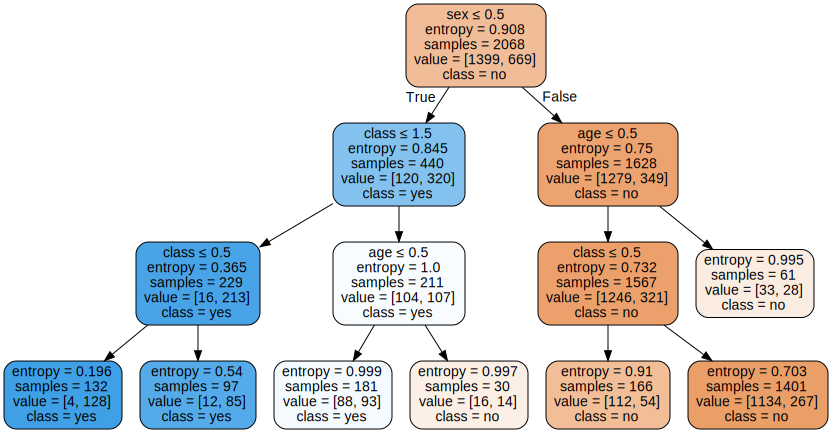

In [125]:

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.06)
arbol_parametrizado = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=30)
arbol_parametrizado = arbol_parametrizado.fit(X_train,y_train)
y_pred = arbol_parametrizado.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))


dot_data = tree.export_graphviz(arbol_parametrizado, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True, rounded=True,
                                special_characters=True)  

graph = graphviz.Source(dot_data)

graph